# Exercise about classes and objects


We want to perform some analysis on the students' marks at the exams. To this end:
1. we will model the students and their career
2. we will generate some random data
3. we will try to plot these data and, hopefully, we will observe things that should be expected!

---

## Ex. 1: Model the single course

Create a class to model a single course, characterized by:
1. a name,
1. a unique idCourse (add a field with the exact name `idCourse`)
1. a number of cfu

Provide also the following methods:
- override the method `__str__()` so that easy print will be supported
- override the `==` operator: a course is equal to another if the idCourse is the same
- store in a **class variable** the default set of exam names and credits that is given below
- provide a **class method** that, given a data structure containing the info about the courses, will return a list of instances of this class.

To easy the development, the following data structure is given:
    
    examNames = {
        96140:('ORGANIZZAZIONE AZIENDALE M', 11),
        33980:('SERVIZI GENERALI DI IMPIANTO M', 6),
        96134:('AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M', 12),
        34431:('SISTEMI DI PRODUZIONE AVANZATI M', 9),
        34439:('STRATEGIA AZIENDALE M', 12)
    }


In [1]:
# utilities
# This part of the code will contain some utilitiy variables and functions

# verboseTest: if True, some verbose tests will be executed 
verboseTest = True


In [2]:
class Course(object):
    '''This class represent the info about a course.'''
    def __init__(self, idCourse, name, cfu):
        '''Constructor of the class Course'''
        self.idCourse = idCourse
        self.name = name
        self.cfu = cfu    
    
    def __str__(self):
        '''toString method for the class Course'''
        return str(self.idCourse) + ': ' + self.name.title() + ', ' + str(self.cfu) + ' cfu'
    
    examNames = { # class variable
        96140:('ORGANIZZAZIONE AZIENDALE M', 11),
        33980:('SERVIZI GENERALI DI IMPIANTO M', 6),
        96134:('AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M', 12),
        34431:('SISTEMI DI PRODUZIONE AVANZATI M', 9),
        34439:('STRATEGIA AZIENDALE M', 12)
    }
    
    @classmethod
    def generateCourses(cls, exams=examNames):
        '''Generate a list of instances of courses.
        Courses are instantiated on the basis of the class variable examNames,
        if not specified otherwise.'''
        result = [ cls(idCourse, exams[idCourse][0], exams[idCourse][1])
                  for idCourse in exams.keys() ]
        return result

    def __eq__(self, other):
        return self.idCourse == other.idCourse
# End  class Course

# Test class course
if verboseTest:
    title = 'Class Course: ' + Course.__doc__
    print(title)
    print('-'*(len(title)+1))
    print('Test of the class:')
    aCourse = Course(96140, 'ORGANIZZAZIONE AZIENDALE M', 11)
    courses = Course.generateCourses()
    for c in courses:
        print(c)
    print()

Class Course: This class represent the info about a course.
------------------------------------------------------------
Test of the class:
96140: Organizzazione Aziendale M, 11 cfu
33980: Servizi Generali Di Impianto M, 6 cfu
96134: Automazione Industriale E Sistemi Di Lavorazione M, 12 cfu
34431: Sistemi Di Produzione Avanzati M, 9 cfu
34439: Strategia Aziendale M, 12 cfu



## Ex. 2: Modeling the event "an exam has been passed"

Create a class `ExamPassed` to represent the event that an exam has been passed. An `ExamPassed` will be characterized by:
- a date (year, month, day)
- a course (an instance of class Course)
- the obtained mark (an integer; for simplicity, laude will not be considered)
Instances of this class should represent the fact that on the specified date the exam has been passed with the specified mark.

Provide also the following methods:
- override the method `__str__()` so that easy print will be supported
- override the method `__eq__()`: two passed exames are the same if they are about the same course; thus, `Course.__eq__()` should be exploited.

In [3]:
class ExamPassed(object):
    '''This class represent the fact that an exame has been passed on a certain dat with a certain mark'''
    def __init__(self, year, month, day, course, mark):
        '''Constructor of the class ExamPassed'''
        self.year = year
        self.month = month
        self.day = day
        self.course = course
        self.mark = mark
    def __str__(self):
        result = str('The ' + str(self.day) + '/' + str(self.month) + '/' + str(self.year) +
                  ' the exam ' + self.course.name.title() +
                  ' has been passed with mark ' + str(self.mark) + '/' + str(30) + '.'
                 )
        return result
    def __eq__(self, other):
        return self.course == other.course
# End class ExamPassed

# testing the class
if verboseTest:
    title = 'Class ExamPassed: ' + ExamPassed.__doc__
    print(title)
    print('-'*(len(title)+1))
    print('Test of the class:')
    aCourse = Course(96140, 'ORGANIZZAZIONE AZIENDALE M', 11)
    anExam = ExamPassed(2023,3,16, aCourse, 30)
    print(anExam)
    anExam2 = ExamPassed(2023,3,17, aCourse, 28)
    print('Testing equality (True is expected):', anExam==anExam2)
    print()

Class ExamPassed: This class represent the fact that an exame has been passed on a certain dat with a certain mark
-------------------------------------------------------------------------------------------------------------------
Test of the class:
The 16/3/2023 the exam Organizzazione Aziendale M has been passed with mark 30/30.
Testing equality (True is expected): True



## Ex. 3: Modeling the student

Create a class `Student` to represent a student, characterized by:
- a name
- a family name
- the list of the courses she has in her career (exploit the static method in the class Course)
- the list of already passed exams; initally, it's empty

Add also the following methods:
- override the method `__str__()` so that easy print will be supported
- a method that allows to add a passed exam (an instance of ExamPassed); if the exam was already passed, the method should return `False` (and do nothing); otherwise, adds the passed exam to the proper list and returns `True`
- a method that return the list of the courses not passed yet

In [4]:
class Student(object):
    '''The class represent a Student'''
    def __init__(self, name, familyName, courses=Course.generateCourses()):
        '''Constructor of the class Student'''
        self.name = name
        self.familyName = familyName
        self.courses = courses
        self.passedExams = []
    def __str__(self):
        result = self.name + ' ' + self.familyName
        return result
    
    def addPassedExam(self, passed):
        if passed in self.passedExams:
            return False
        else:
            self.passedExams.append(passed)
            return True
    
    def notPassedYet(self):
        passedCourses = [p.course for p in self.passedExams]
        result = [course for course in self.courses if course not in passedCourses]
        return result
# End class Student

if verboseTest:
    title = 'Class Student: ' + Student.__doc__
    print(title)
    print('-'*(len(title)+1))
    s1 = Student('Federico', 'Chesani')
    print(s1)
    print('Courses to be passed yet (there should be all the exams):')
    for c in s1.notPassedYet():
        print(c)
    print()
        
    aCourse = Course(96140, 'ORGANIZZAZIONE AZIENDALE M', 11)
    print('Trying to add a passed exam (True expected):', s1.addPassedExam(ExamPassed(2023,3,16, aCourse, 30)) )
    print('Trying to add twice the same passed exam (False expected):', s1.addPassedExam(ExamPassed(2023,3,16, aCourse, 30)))
    print()
    
    print('Courses to be passed yet (now an exam has been passed):')
    for c in s1.notPassedYet():
        print(c)

Class Student: The class represent a Student
---------------------------------------------
Federico Chesani
Courses to be passed yet (there should be all the exams):
96140: Organizzazione Aziendale M, 11 cfu
33980: Servizi Generali Di Impianto M, 6 cfu
96134: Automazione Industriale E Sistemi Di Lavorazione M, 12 cfu
34431: Sistemi Di Produzione Avanzati M, 9 cfu
34439: Strategia Aziendale M, 12 cfu

Trying to add a passed exam (True expected): True
Trying to add twice the same passed exam (False expected): False

Courses to be passed yet (now an exam has been passed):
33980: Servizi Generali Di Impianto M, 6 cfu
96134: Automazione Industriale E Sistemi Di Lavorazione M, 12 cfu
34431: Sistemi Di Produzione Avanzati M, 9 cfu
34439: Strategia Aziendale M, 12 cfu


## Ex. 4: generate a list of students

Write a function that will generate a list of instances of Student, initially all with no passed exams.
In order to generate names that do make sense, choose randomly from the following lists:

    names = ['Marco', 'Alessandro', 'Giuseppe', 'Flavio', 'Luca', 'Giovanni', 'Roberto', 'Andrea', 'Stefano', 'Angelo', 'Francesco', 'Mario', 'Luigi', 'Anna', 'Maria', 'Sara', 'Laura', 'Aurora', 'Valentina', 'Giulia', 'Rosa', 'Gianna', 'Giuseppina', 'Angela', 'Giovanna', 'Sofia', 'Stella']  
Source <https://en.wikipedia.org/wiki/Italian_name>

    surnames = ['Rossi', 'Russo', 'Ferrari', 'Esposito', 'Bianchi', 'Romano', 'Colombo', 'Ricci', 'Marino', 'Greco', 'Bruno', 'Gallo', 'Conti', 'De Luca', 'Mancini', 'Costa', 'Giordano', 'Rizzo', 'Lombardi', 'Moretti']
Source: <https://en.wiktionary.org/wiki/Appendix:Italian_surnames>

To achieve a random combination of names and family names, it is possible to use the `random.choice` function. An example of usage is the following piece of code:

In [5]:
# Example of using random.sample
import random

myList = ['Federico', 'Chiara', 'Francesco', 'Elena']
print(random.choice(myList))
print(random.choice(myList))
print(random.choice(myList))

Chiara
Chiara
Francesco


Alternatively, the `random.choices()` (available from python 3.6) can be used as well. See the documentation <https://www.w3schools.com/python/ref_random_choices.asp> about it.

In [6]:
names = ['Marco', 'Alessandro', 'Giuseppe', 'Flavio',
         'Luca', 'Giovanni', 'Roberto', 'Andrea', 'Stefano',
         'Angelo', 'Francesco', 'Mario', 'Luigi', 'Anna', 'Maria',
         'Sara', 'Laura', 'Aurora', 'Valentina', 'Giulia', 'Rosa',
         'Gianna', 'Giuseppina', 'Angela', 'Giovanna', 'Sofia', 'Stella']
surnames = ['Rossi', 'Russo', 'Ferrari', 'Esposito', 'Bianchi', 'Romano',
            'Colombo', 'Ricci', 'Marino', 'Greco', 'Bruno', 'Gallo', 'Conti',
            'De Luca', 'Mancini', 'Costa', 'Giordano', 'Rizzo', 'Lombardi', 'Moretti']




def generateStudents(numStudents=None):
    students = []
    if numStudents == None:
        numStudents = int(input('How many students you want to generate? '))
    
    for i in range(0,numStudents):
        s = Student(random.choice(names), random.choice(surnames))
        students.append(s)
    return students

# test
if verboseTest:
    for s in generateStudents(10):
        print(s)

Giulia Conti
Mario Russo
Maria Moretti
Angelo Ricci
Sofia Ferrari
Luigi Giordano
Gianna Conti
Flavio Moretti
Angelo Marino
Giovanna Mancini


## Ex. 5: Generate random some marks

Given a list of students, we would like to add some marks to each student. As a first step, we will focus on generating a number of marks. Later (next exercise) we will join the marks and the students.

There are many different ways for generating random numbers, taking into account for example which distribution should the marks exhibit, etc.

To this end, many solutions are available. Just to mention a couple:
- the `numpy` library, and the `Random` generator (see <https://numpy.org/doc/stable/reference/random/generator.html>);
- the built-in `random` library <https://www.w3schools.com/python/module_random.asp> and the function `random.choices()` <https://www.w3schools.com/python/ref_random_choices.asp>

We will adopt the last approach. In the following, you will find the function `generatePseudoRandomMarks(courses, numOfStudents)`, where `courses` is a list of instances of the class Course, with a mandatory attribute name `idCourse`. The function will generate a list of lists of couples `(idCourse,mark)`. Each sublist represents the marks obtained by a student.

The function is already prepared for you, don't look at it, but simply use it. Later on, once finished all the exercise, come back here and have a look on how data was generated.

In [7]:
import random

def generatePseudoRandomMarks(courses, numOfStudents):
    ''' This function returns a list of list of couples, each sublist tuple of `<= numExams` elements,
    each element a couple `(idCourse,mark)`.
    The length of the list is given by the variable numOfSamples.
    courses is a list of instances of class Course'''
    # distribution of the students in categories
    studentsAggregatedCategory = random.choices(['a','b','c','d','e'], weights=[30, 30, 20, 10, 10], k=numOfStudents)
    # distribution of the students to the corresponding average
    studentsAggregatedDistribution = []
    for c in studentsAggregatedCategory:
        if c == 'a': averageMark = random.choice([30,29,28])
        elif c == 'b': averageMark = random.choice([27,26,25])
        elif c == 'c': averageMark = random.choice([24,23,22])
        elif c == 'd': averageMark = random.choice([21,20])
        elif c == 'e': averageMark = random.choice([19,18])
        studentsAggregatedDistribution.append(averageMark)
    # generation of the marks
    result = []
    for c in studentsAggregatedDistribution:
        delta1 = random.choices([-2, -1, 0, 1, 2, None], weights=[1,3,6,3,1,1], k=len(courses))
        delta2 = random.choices([-3, -2, -1, 0, 1, None], weights=[6,3,1,1,1,6], k=1)
        temp = []
        for i in range(0,len(courses)):
            if i!=2:
                d = delta1[i]
            else:
                d = delta2[0]
            if d != None:
                temp.append((courses[i].idCourse, max(min(c+d,30),18)) )
        result.append(temp)
    return result

# tests
if verboseTest:
    print(generatePseudoRandomMarks(Course.generateCourses(), 10))

[[(96140, 25), (33980, 25), (96134, 22), (34431, 26), (34439, 26)], [(96140, 27), (33980, 27), (34431, 25), (34439, 27)], [(96140, 29), (33980, 28), (96134, 25), (34431, 29), (34439, 28)], [(96140, 29), (33980, 28), (34431, 30), (34439, 29)], [(96140, 25), (33980, 24), (96134, 23), (34431, 26), (34439, 27)], [(96140, 21), (33980, 21), (96134, 18), (34431, 21), (34439, 22)], [(96140, 24), (33980, 25), (34431, 25), (34439, 27)], [(96140, 25), (33980, 24), (96134, 22), (34431, 23), (34439, 25)], [(96140, 30), (33980, 30), (34431, 28), (34439, 28)], [(96140, 22), (34431, 22), (34439, 22)]]


## Ex. 6: Generate the data set

Write a function that, using the code at the exercise 4, and the `generatePseudoRandomMarks()` function in ex. 5, will return a list of students with all the marks.

In [8]:
def generateDataSet(numOfStudents):
    
    # generate the students
    students = generateStudents(numOfStudents)
    
    #generate the courses
    courses =  Course.generateCourses()
    
    # generate the marks
    marksTuples = generatePseudoRandomMarks(courses, numOfStudents)
    
    # merge them together
    result = []
    for s in range(0,numOfStudents):
        for m in marksTuples[s]:
            for c in courses:
                if c.idCourse == m[0]:
                    e = ExamPassed(2023,3,21, c, m[1])
                    break # AAARGH
            students[s].addPassedExam(e)
    return students
    

if verboseTest:
    dataSet = generateDataSet(100)
    for s in dataSet:
        for c in s.notPassedYet(): 
            print(c.name)
    

AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
SERVIZI GENERALI DI IMPIANTO M
SISTEMI DI PRODUZIONE AVANZATI M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
SISTEMI DI PRODUZIONE AVANZATI M
STRATEGIA AZIENDALE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
SISTEMI DI PRODUZIONE AVANZATI M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M
AUTOMAZIONE INDUSTRIALE E SISTEM

## Final: try to answer the following questions

1. For each course, print how many students have passed it, and how many have not passed it. Looking at the numbers, can we say that there is a course more difficult than others?

2. For each course, compute the mean over the students of that course, by using the function `numpy.mean(list_of_values)` defined in the module `numpy`.

3. Let us plot the occurencies/frequencies of the marks for an exam. To do so, we need to:
    1. extract the marks for that exam (you should already be able to...)
    
    2. count the occurencies, using the `pandas` library (a bit overkill), and the method `value_counts()`
            import pandas as pd
            mylist = [\"a\", \"a\", \"b\", \"c\", \"c\", \"c\", \"c\", \"d\", \"d\"]
            pd.Series(mylist).value_counts()
            # output
            c    4
            a    2
            d    2
            b    1
        The method return a dictionary, where the keys are the values, and the values are the occurencies. Once you get the count, you simply need to constructs the `X` and `Y` vectors
    
    3. Plot them by using the matplotlib.pyplot class from mathplotlib, and the `plot(X,Y, linewidth=2, color='r')` method (where `X` and `Y` are two lists of values.
    


Statistics of the passed exams (passed/not passed/total):
----------------------------------------------------------
ORGANIZZAZIONE AZIENDALE M: (9322/678/10000)
SERVIZI GENERALI DI IMPIANTO M: (9320/680/10000)
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M: (6659/3341/10000)
SISTEMI DI PRODUZIONE AVANZATI M: (9317/683/10000)
STRATEGIA AZIENDALE M: (9281/719/10000)


Mean values of the passed exams:
---------------------------------
ORGANIZZAZIONE AZIENDALE M: 24.94
SERVIZI GENERALI DI IMPIANTO M: 24.96
AUTOMAZIONE INDUSTRIALE E SISTEMI DI LAVORAZIONE M: 23.16
SISTEMI DI PRODUZIONE AVANZATI M: 24.93
STRATEGIA AZIENDALE M: 24.94



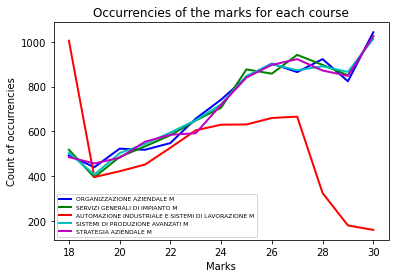

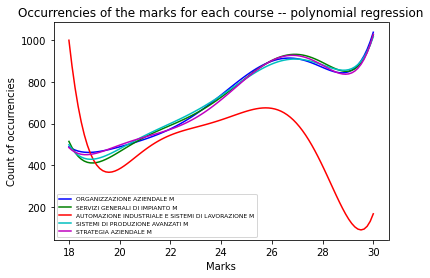

In [10]:
import numpy

# first of all, generate the data set
numOfSamples = 10000
dataSet = generateDataSet(numOfSamples)
courses = Course.generateCourses()

# 1.
title = 'Statistics of the passed exams (passed/not passed/total):'
print()
print(title)
print('-'*(len(title)+1))
for c in courses:
    totPassed = 0
    totNotPassed = 0
    for s in dataSet:
        passedCourses = [pe.course for pe in s.passedExams]
        if c in passedCourses:
            totPassed += 1
        else:
            totNotPassed += 1
    print(c.name + ':', '('+str(totPassed)+'/'+str(totNotPassed)+'/' + str(len(dataSet)) + ')')
print()

# 2.
title = 'Mean values of the passed exams:'
print()
print(title)
print('-'*(len(title)+1))
for c in courses:
    values = []
    for s in dataSet:
        for pe in s.passedExams:
            if pe.course == c:
                values.append(pe.mark)
    print(c.name+':', round(numpy.mean(values),2))
print()

# 3. Occurences/frequencies and plot
import matplotlib.pyplot as plt
import pandas as pd

colors = ['b','g','r','c','m']
i=0
for c in courses:
    values = []
    for s in dataSet:
        for pe in s.passedExams:
            if pe.course == c:
                values.append(pe.mark)
    occurrences = pd.Series(values).value_counts()
    x = occurrences.keys().sort_values()
    y = [occurrences[i] for i in x]
    plt.plot(x, y, linewidth=2, color=colors[i % 5], label = c.name)
    i+=1
plt.legend(loc="lower left", prop={'size': 6})
plt.xlabel('Marks')
plt.ylabel('Count of occurrencies')
plt.title('Occurrencies of the marks for each course')
plt.show()

# 4. Bonus: an example of polinomial regression
import numpy
colors = ['b','g','r','c','m']
i=0
for c in courses:
    values = []
    for s in dataSet:
        for pe in s.passedExams:
            if pe.course == c:
                values.append(pe.mark)
    occurrences = pd.Series(values).value_counts()
    x = occurrences.keys().sort_values()
    y = [occurrences[i] for i in x]
    # plt.plot(x, y, linewidth=2, color=colors[i % 5], label = c.name)
    mymodel = numpy.poly1d(numpy.polyfit(x, y, 6))
    myline = numpy.linspace(18, 30, 100)
    plt.plot(myline, mymodel(myline), color=colors[i % 5], label = c.name)
    i+=1
plt.legend(loc="lower left", prop={'size': 6})
plt.xlabel('Marks')
plt.ylabel('Count of occurrencies')
plt.title('Occurrencies of the marks for each course -- polynomial regression')
plt.show()